Epoch 1/4
30/30 [==============================] - 2s 60ms/step - loss: 0.5560 - accuracy: 0.7653 - val_loss: 0.4255 - val_accuracy: 0.8622
Epoch 2/4
30/30 [==============================] - 1s 38ms/step - loss: 0.3527 - accuracy: 0.8870 - val_loss: 0.3367 - val_accuracy: 0.8747
Epoch 3/4
30/30 [==============================] - 1s 39ms/step - loss: 0.2626 - accuracy: 0.9130 - val_loss: 0.2997 - val_accuracy: 0.8834
Epoch 4/4
30/30 [==============================] - 1s 36ms/step - loss: 0.2143 - accuracy: 0.9265 - val_loss: 0.2764 - val_accuracy: 0.8901


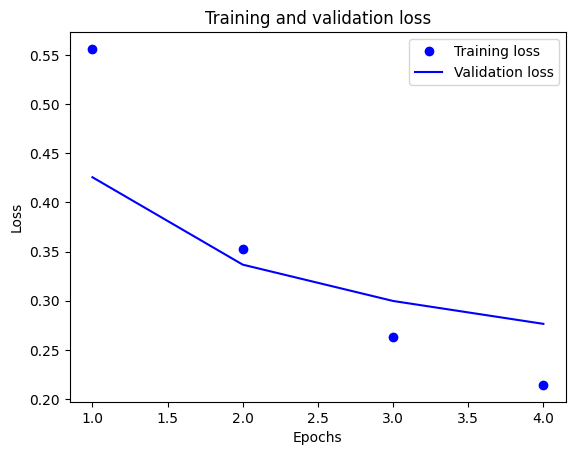

In [11]:
# in this, we'll classify movie reviews as positive or negative based on the text of the reviews. We will use a IMDB data set
# labels classify into 2 classes: 0 and 1

import keras
import numpy as np
import matplotlib.pyplot as plt

from keras import models
from keras import layers
from keras import datasets

# only keep the top 10,000 most frequently occurring words in the training data
# training data consists of list of reviews; each review is a list of word indices (encoding a sequence of words) for entries of our 10,000 size dictionary
# 50,000 samples
imdb = datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
            num_words=10000)

# convert each sentence into 10,000 dimension vector. e.g [8,5] -> [0,0,0,0,1,0,0,1,0,...]
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# model defined
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# separate validation data from training data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# fit
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4, # 20 is too much, over-trains in that case
                    batch_size=512,
                    validation_data=(x_val, y_val))


history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



